# Inaugural Project

The project is composed of this notebook along with a py-file (inauguralproject.py) and a README.md

# The model and key concepts

In this model for an Exchange Economy we have two consumers, A and B, whose consumption and endowment we will calculate in different scenarios. The results are all being presented in our Notebook further down. At first we highlight some of the key concepts of the model.

$$
\begin{align*}
\omega_{1}^{B} & = 1 - \omega_{1}^{A} \\
\omega_{2}^{B} & = 1 - \omega_{2}^{A} \\
\end{align*}
$$
We note, that the combined endowment of the two consumers sum to one. Hence they cannot consume more than they have combined, which is one. Therefore we would not expect results for consumption, where single consumptions exceeds this.

Consumer A:
$$
\begin{align*}
u^A(x_1,x_2) & = x_1^{\alpha} x_2^{1-\alpha}, \alpha \in (0,1) \\
x_1^{A^\star}(p,\omega^A) & = \alpha \left( \frac{p_1\omega^A_1 + p_2\omega^A_2}{p_1} \right) \\
x_2^{A^\star}(p,\omega^A) & = (1-\alpha) \left( \frac{p_1\omega^A_1 + p_2\omega^A_2}{p_2} \right) \\
\end{align*}
$$

Consumer B:
$$
\begin{align*}
u^B(x_1,x_2) & = x_1^{\beta} x_2^{1-\beta}, \beta \in (0,1) \\
x_1^{B^\star}(p,\omega^B) & = \beta \left( \frac{p_1\omega^B_1 + p_2\omega^B_2}{p_1} \right) \\
x_2^{B^\star}(p,\omega^B) & = (1-\beta) \left( \frac{p_1\omega^B_1 + p_2\omega^B_2}{p_2} \right) \\
\end{align*}
$$

We note, that both consumers have Cobb-Douglas utility functions with the fixed parameters $\alpha = \frac{1}{3}$ and $\beta = \frac{2}{3}$. As both $\alpha$ and $\beta$ are between 0 and 1 it indicates diminishing marginal utility for each good as more of the specific good is consumed. We also note, that from their preferences, consumer A values good 2 relatively more than good 1. The reverse applies to consumer B. Lastly, one consumer consuming everything would imply a maximum utility of that consumer of 1. We suspect, that the sum of the two consumers utilities can exceed 1, if the goods are divided so that they each get more of their prefered good, respectively (good 2 for consumer A and good 1 for consumer B).

The Walras market clearing equilibrium are expressed as follows for both goods:
$$
\begin{align*}
x_1^{A^\star}(p,\omega^A) + x_1^{B^\star}(p,\omega^B) & = \omega_{1}^{B} + \omega_{1}^{A} \\
x_2^{A^\star}(p,\omega^A) + x_2^{B^\star}(p,\omega^B) & = \omega_{2}^{B} + \omega_{2}^{A} \\
\end{align*}
$$
As noted in the text, Walras’ law appliy, so if one market clears, the other one does as well. From the equations we can see, that this happens, when an amount equal to the two consumers endowments are consumed implying a combined consumption of each good of 1.

Lastly we have, that the numeraire price is $p_2 = 1$


# Imports and setup

In [17]:
#We start by importing different modules, setting up and importing the class from our py-file (inauguralproject)
import numpy as np
from types import SimpleNamespace
import matplotlib.pyplot as plt
from scipy import optimize

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from inauguralproject import ExchangeEconomyClass #From our py-file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

As described above, from the model we have, that consumer A prefers good 2 realtive to good 1 in the same way, that consumer B prefers good 1 to good 2. Thus, as we are to illustrate the combinations of $x_1^{A}$ and $x_2^{A}$ according to C:
$$
\begin{align*}
C = \left\{ 
(x^A_1, x^A_2) \; \middle| \; 
 
\begin{aligned}
&u^A(x^A_1, x^A_2) \geq u^A(\omega^A_1, \omega^A_2) \\
&u^B(x^B_1, x^B_2) \geq u^B(\omega^B_1, \omega^B_2) \\
&x^B_1 = 1 - x^A_1, \; x^B_2 = 1 - x^A_2 \\
&x^A_1 ,x^A_2 \in \{0, \frac{1}{N}, \frac{2}{N}, \ldots, 1\}, \; N = 75
\end{aligned}

\right\}
\end{align*}
$$

We suspect, that the allocation of the pareto efficient area will be "skeewed" towards sets of $x_1^{A}$ and $x_2^{A}$ such that consumer A for relative more cases consumes more of x2 than of x1, while the opposite is the case for consumer B.

In [18]:
#Setting up the code needed to construct the Edgeworth box further down

model = ExchangeEconomyClass() #We refer to the class in our py-file after we have defined the functions in the py-file.

par = model.par

#Parameters according to the question
N = 75 
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

grid_x1A = np.linspace(0,1,N+1) # We define a grids for each good between 0 and 1. N+1 to ensure inclusion of endpoints (0 and 1) while still having 75 points in between.
grid_x2A = np.linspace(0,1,N+1)

possible_x1A = [] # we create lists to which we later can append the specific data points for each good.
possible_x2A = []

for x1A in grid_x1A: #We loop over the two goods in grids constructed above.
    for x2A in grid_x2A:
        x1B = 1 - x1A # We make consumer B goods expressed by consumer A goods.
        x2B = 1 - x2A
        uA = model.utility_A(x1A,x2A) # We create the utilities for consumer A and B refering to model in py-file.
        uB = model.utility_B(x1B,x2B)

        if uA >= model.utility_A(w1A,w2A) and uB >= model.utility_B(w1B, w2B): # we check if allocations satisfy the conditions and append for depiction in edgeworth box.
            possible_x1A.append(x1A)
            possible_x2A.append(x2A)

print(f'First 3 points of [x1A, x2A] = [{", ".join([f"{x:.4f}" for x in possible_x1A[:3]])}], [{", ".join([f"{x:.4f}" for x in possible_x2A[:3]])}]')
# We see, that these points fit with the top left points depicted in the edgeworth box below.


First 3 points of [x1A, x2A] = [0.0800, 0.0933, 0.0933], [0.9600, 0.8800, 0.8933]


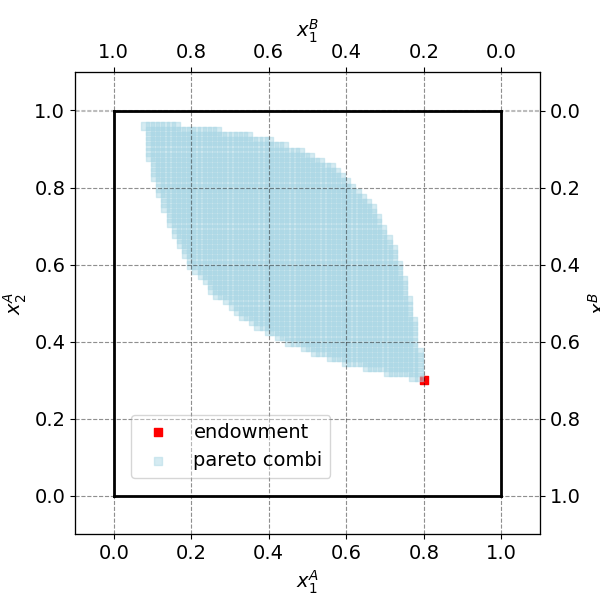

In [48]:
model = ExchangeEconomyClass()

par = model.par

# Total endowment to be considered
w1bar = 1.0
w2bar = 1.0

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# We ad the endowment (w1A = 0.8 and w2A = 0.3) as a red square and add the area of possible pareto efficient combinations
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='lightblue', alpha=0.5, label='pareto combi')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower left',bbox_to_anchor=(0.1,0.1));

Key take away: we see from the depiction, that the combination of pareto efficient combinations is distributed towards more solutions of consumer A consuming relatively more of good 2 and the opposite for consumer B. We see, that all combinations satisfy, that the two consumers cannot consume more than the total endowments.

# Question 2

The errorterm for the consumption of each good is defined by:
$$
\begin{align*}
\varepsilon_1(p,\omega) = x^{A^\star}_1(p,\omega^A) - \omega^A_1 + x^{B^\star}_1(p,\omega^B) - \omega^B_1 \\
\varepsilon_2(p,\omega) = x^{A^\star}_2(p,\omega^A) - \omega^A_2 + x^{B^\star}_2(p,\omega^B) - \omega^B_2 \\
\end{align*}
$$
for $p_1 \in P_1 = \left\{0.5, 0.5 + \frac{2\times 1}{N}, 0.5 + \frac{2 \times 2}{N}, \ldots, 2.5\right\}$

In this case we can interpret these errorterms as the sum of discrepancy between optimal consumption for each consumer and their initial endowments. If the error term for a good is positive, it means that the consumers consumption exceeds exceeds their initial endowment of that good. This suggests that the consumers desires to consume more of the good than they currently possess. On the other hand, if the error term is negative, it means that the sum of the consumers' optimal consumption of the good is less than their initial endowment. In this case, they may have excess of the good relative to their preferences.

[0.533333333333333, 0.47594936708860747, 0.42409638554216866, 0.3770114942528735, 0.334065934065934]
[-0.2666666666666666, -0.25066666666666654, -0.23466666666666652, -0.2186666666666665, -0.2026666666666665]
<class 'list'>
<class 'list'>
<class 'list'>


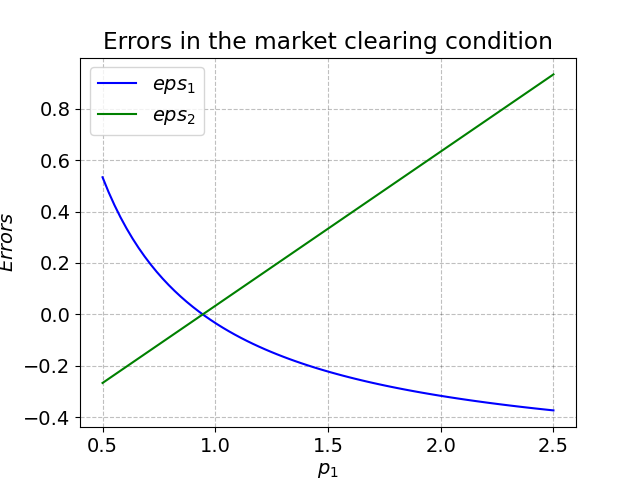

In [52]:
#First we create a list of p1 according to the statement above: 
grid_p1 = np.linspace(0.5,2.5,N+1)
p1 = grid_p1.tolist()

# Then we create empty lists of the error terms:
err1 = []
err2 = []

#Using the check_market_clearing from our py-file, we append the eps1 and eps2 to respective error-lists above
for i in p1:
    eps1, eps2 = model.check_market_clearing(i)
    
    err1.append(eps1)
    err2.append(eps2)

# Check
print(err1[0:5])
print(err2[0:5])
print(type(p1))
print(type(err1))
print(type(err2))

# We can display in a figure using matplotlib imported earlier
fig = plt.figure()

# We create the plot 
ax = fig.add_subplot(1,1,1)

#We add the error terms 1 and 2 as eps1 (blue) and eps 2 (green) respectively
ax.plot(p1,err1,label='$eps_{1}$',color='blue')
ax.plot(p1,err2,label='$eps_{2}$',color='green')

ax.set_title('Errors in the market clearing condition')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$Errors$')
ax.legend(loc='upper left');


Key take away: from plotting the size of the error terms, we can see, that the error terms intersect and are zero for a price of p1 a little less than 1.

# Question 3

Continuing on from the key take away in question 2, we expect, that the market clearing price in the market equilibrium, will be close to the price for the intersection of the error terms above. This should be so, since a point where these error terms are eliminated or significantly minimized, consumers are adjusting their consumption patterns through trade to achieve their desired allocations relative to their endowments.

In [61]:
def find_marketclear_p1(p1, err1, err2): #we define a function based on the variables p1, err1 and err2 created above.
    min_diff = float('inf') #min_diff is initially defined to pos infinity as we minimize the difference between err1 and err2 from right to left on the axis above.
    min_diff_p1 = [] # We creat an open list for the corresponding p1
    
    for i in range(len(p1)): #we loop over the i elements in p1
        diff = abs(err1[i] - err2[i]) #we store the difference between the errors for each i
        if diff < min_diff: #if the absolute diff in diff is smaller than the value in min_diff, we want to store that along with the corresponding p1
            min_diff = diff
            min_diff_p1 = p1[i]
    
    return min_diff_p1

# We call the function to store and print the marketprice in the variable marketclear_p1 given the arguments p1, err1, err2.
marketclear_p1 = find_marketclear_p1(p1, err1, err2)
if marketclear_p1 != 0:
    print(f'Market clearing price: p1 = {marketclear_p1:.3f}')

print(f'x1A = {model.demand_A(marketclear_p1)[0]:.3f}, x2A = {model.demand_A(marketclear_p1)[1]:.3f}')
print(f'Utility for A = {model.utility_A(model.demand_A(marketclear_p1)[0], model.demand_A(marketclear_p1)[1]):.3f}')
print(f'x1B = {1-model.demand_A(marketclear_p1)[0]:.3f}, x2B = {1-model.demand_A(marketclear_p1)[1]:.3f}')
print(f'Utility for B = {model.utility_B(1-model.demand_A(marketclear_p1)[0], 1-model.demand_A(marketclear_p1)[1]):.3f}')



Market clearing price: p1 = 0.953
x1A = 0.372, x2A = 0.708
Utility for A = 0.571
x1B = 0.628, x2B = 0.292
Utility for B = 0.486


Key take away: we find a market clearing price for p1 of 0.953, which supports the graphical depiction of the error terms that we found in question 3. We see, that for this price, consumer A will consume relatively more of good two (which is prefered by A) than consumer B will consume of good one (which is prefered by B), resulting in a higher utility for A than B.

# Question 4

In [23]:
#Question 4a
def max_utilityA_given_p1(p): #we define a function based on the variables p1
    max_uA = float('-inf') #we create the variable to store utility higher than minus infinity
    max_uA_p1 = [] # We creat an open list for the corresponding p1
    
    for i in p: #we loop over the i elements in p1. If demand for both goods given i is pos we will store the utility.
        if 1-model.demand_B(i)[0] > 0 and 1-model.demand_B(i)[1]>0:
            utilityA = model.utility_A(1-model.demand_B(i)[0], 1-model.demand_B(i)[1]) 
            if utilityA > max_uA: #Then if that utility is greater in max_uA, we store it as well as the corresponding price
                max_uA = utilityA
                max_uA_p1 = i
    
    return max_uA_p1, max_uA

p1_4a, uA_4a = max_utilityA_given_p1(p1) #we call the function to print the values
x1A_4a = 1-model.demand_B(p1_4a)[0]
x2A_4a = 1-model.demand_B(p1_4a)[1]

print(f'The price is: {p1_4a:.6f} resulting in the utility: {uA_4a:.6f}')
print(f'This amount of goods obtained for the given price above is: x1A = {x1A_4a:.6f} and x2A = {x2A_4a:.6f}')


The price is: 1.886667 resulting in the utility: 0.633616
This amount of goods obtained for the given price above is: x1A = 0.619317 and x2A = 0.640889


In [64]:
#Question 4b

#We use the function as created above however this time with a positive p (we set it to ]0;100])

grid_p1_pos = np.linspace(0.01,100,1000000)
p1_pos = grid_p1_pos.tolist()

p1_4b, uA_4b = max_utilityA_given_p1(p1_pos)
x1A_4b = 1-model.demand_B(p1_4b)[0]
x2A_4b = 1-model.demand_B(p1_4b)[1]

print(f'The price is: {p1_4b:.6f} resulting in the utility: {uA_4b:.6f}')
print(f'This amount of goods obtained for the given price above is: x1A = {x1A_4b:.6f} and x2A = {x2A_4b:.6f}')

The price is: 1.899313 resulting in the utility: 0.633621
This amount of goods obtained for the given price above is: x1A = 0.620964 and x2A = 0.640046


Conclusion:

# Question 5

Explanation...

In [43]:
#Question 5a
def max_utilityA_5a(x): #we define a function based on the variables p1
    x1_init = 0
    x2_init = 0
    x = [x1_init,x2_init]
    uA_max = 0
                
    for x1 in possible_x1A:
        for x2 in possible_x2A:
        uA_max = model.utility_A(x1,x2)
        if model.utility_A(x1,x2) > uA_max and model.utility_B(1-x1,1-x2) >= model.utility_B(1-par.w1A,1-par.w2A):
            uA_max = uAnew
            x1best = x1 
            x2best = x2
    return max_uA_p1, uA_max

IndentationError: expected an indented block after 'for' statement on line 9 (1244229737.py, line 10)

In [25]:
#Question 5b
model = ExchangeEconomyClass()
optimal_xA_5b, optimal_xB_5b = model.find_optimal_5b(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {optimal_xA_5b[0]:.3f}, x2A = {optimal_xA_5b[1]:.3f}')
print(f'Resulting utility for consumer A: {model.utility_A(optimal_xA_5b[0],optimal_xA_5b[1]):.3f}')
print(f'Optimal allocation for consumer B: x1B = {optimal_xB_5b[0]:.3f}, x2B = {optimal_xB_5b[1]:.3f}')
print(f'Resulting utility for consumer B: {model.utility_A(optimal_xB_5b[0],optimal_xB_5b[1]):.3f}')

Optimal allocation for consumer A: x1A = 0.576, x2A = 0.844
Resulting utility for consumer A: 0.743
Optimal allocation for consumer B: x1B = 0.424, x2B = 0.156
Resulting utility for consumer B: 0.217


In [65]:
#We want to create a 3d figure to vizualize whether, we have fount the optimal allocation for consumer A
# First we create a mesh of combinations of utility for x1 and x2 values

model = ExchangeEconomyClass()

x_max = 1

def objective_function(x1A, x2A):
    return -model.utility_A(x1A, x2A) 

# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
u_values_mesh = -objective_function(x1_mesh, x2_mesh)

print(u_values_mesh)
print(x_vec)
print(x2_mesh)

Dimension of grid over x1 (same as x2):  (75, 75)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01351351 0.02145137 ... 0.23387831 0.23603887 0.23818958]
 [0.         0.01702596 0.02702703 ... 0.2946682  0.29739034 0.30010007]
 ...
 [0.         0.05621848 0.08924128 ... 0.97297297 0.98196126 0.99090859]
 [0.         0.05647756 0.08965253 ... 0.97745678 0.98648649 0.99547505]
 [0.         0.05673428 0.09006005 ... 0.98189983 0.99097058 1.        ]]
[0.         0.01351351 0.02702703 0.04054054 0.05405405 0.06756757
 0.08108108 0.09459459 0.10810811 0.12162162 0.13513514 0.14864865
 0.16216216 0.17567568 0.18918919 0.2027027  0.21621622 0.22972973
 0.24324324 0.25675676 0.27027027 0.28378378 0.2972973  0.31081081
 0.32432432 0.33783784 0.35135135 0.36486486 0.37837838 0.39189189
 0.40540541 0.41891892 0.43243243 0.44594595 0.45945946 0.47297297
 0.48648649 0.5        0.51351351 0.52702703 0.54054054 0.55405405
 0.56756757 0.58108108 0.59459459 0.6

In [31]:
#We then want to store the values, where the constraint returns a positive number/holds

matrix = np.ones((N,N)) + np.nan

for i,x1 in enumerate(x_vec):
    for m,x2 in enumerate(x_vec):
        var = model.utility_B(1 - x1, 1 - x2) - model.utility_B(par.w1B, par.w2B)
        if var > 0:
            matrix[i,m] = True

print(matrix)

[[ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 [ 1.  1.  1. ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


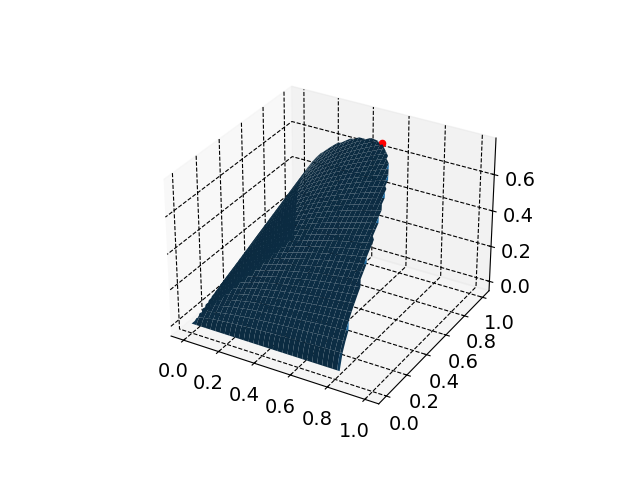

In [33]:
u_val_const = matrix * u_values_mesh

#we can now plot the result we got from above
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(x1_mesh,x2_mesh,u_val_const); # create surface plot in the axis
ax.scatter(optimal_xA_5b[0],optimal_xA_5b[1],model.utility_A(optimal_xA_5b[0],optimal_xA_5b[1]), color='red')
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

Conclusion:

# Question 6

Explanation...

In [35]:
#Question 6a
model = ExchangeEconomyClass()
optimal_xA_6a, optimal_xB_6a, utility_A_6a, utility_B_6a = model.find_optimal_6a(init_guess=[0.9,0.9])
print(f'Optimal allocation for consumer A: x1A = {optimal_xA_6a[0]:.3f}, x2A = {optimal_xA_6a[1]:.3f}')
print(f'Resulting utility for consumer A: {utility_A_6a:.3f}')
print(f'Optimal allocation for consumer B: x1B = {optimal_xB_6a[0]:.3f}, x2B = {optimal_xB_6a[1]:.3f}')
print(f'Resulting utility for consumer B: {utility_B_6a:.3f}')


Optimal allocation for consumer A: x1A = 0.333, x2A = 0.667
Resulting utility for consumer A: 0.529
Optimal allocation for consumer B: x1B = 0.667, x2B = 0.333
Resulting utility for consumer B: 0.529


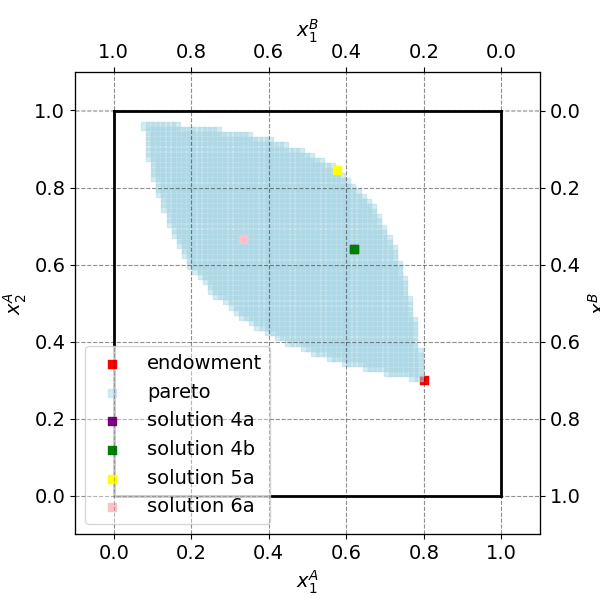

In [39]:
# Question 6b

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(possible_x1A,possible_x2A,marker='s',color='lightblue', alpha=0.5, label='pareto')
ax_A.scatter(x1A_4a,x2A_4a,marker='s',color='purple',label='solution 4a')
ax_A.scatter(x1A_4b,x2A_4b,marker='s',color='green',label='solution 4b')
ax_A.scatter(optimal_xA_5b[0],optimal_xA_5b[1],marker='s',color='yellow',label='solution 5a')
ax_A.scatter(optimal_xA_6a[0],optimal_xA_6a[1],marker='s',color='pink',label='solution 6a')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower left',bbox_to_anchor=(0,0));

Conclusion:

# Question 7

Explanation...

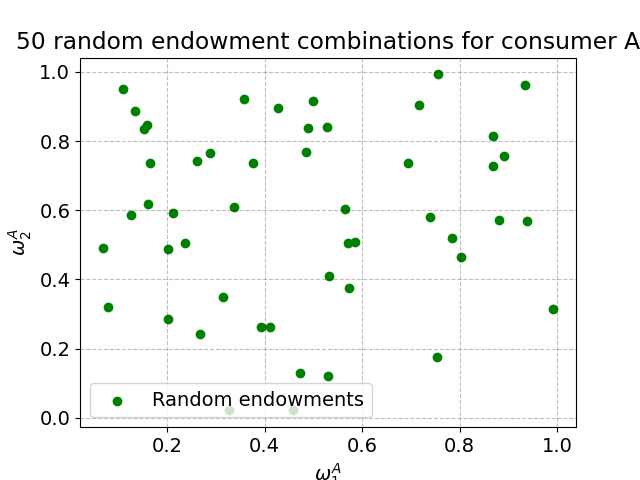

In [42]:
#code
np.random.seed(2000)
omega1A = np.random.uniform(low=0,high=1,size=50)
omega2A = np.random.uniform(low=0,high=1,size=50)

fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.scatter(omega1A, omega2A, color='green', label='Random endowments')

ax.set_title('50 random endowment combinations for consumer A')
ax.set_xlabel('$\omega_{1}^{A}$')
ax.set_ylabel('$\omega_{2}^{A}$')
ax.legend(loc='lower left');

Conclusion:

# Question 8

Explanation...

In [ ]:
#code
model = ExchangeEconomyClass()

def find_optimal_allocation_constrained():
    xA1, 
    xA1 = model.x[0]
    xA2 = x[1]
    return -(self.utility_A(xA1, xA2) + self.utility_B(1 - xA1, 1 - xA2))
        
    def objective_function(x):
        x1A, x2A = x
        return -model.utility_A(x1A, x2A)  

        # We define constraints
        constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-par.w1A, 1-par.w2A)},
                       {'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.utility_B(par.w1A, par.w2A)})
        # Minimize the negative utility function subject to constraints
        result = optimize.minimize(objective_function, init_guess, constraints=constraints, bounds=[(0,1),(0,1)], method='SLSQP')

        # Extract optimal allocation
        optimal_allocation_A = result.x
        optimal_allocation_B = [1 - result.x[0], 1 - result.x[1]]  # Here we calculate B's allocation from A's

        return optimal_allocation_A, optimal_allocation_B

Conclusion: